<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-знакомству-с-данными" data-toc-modified-id="Вывод-по-знакомству-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по знакомству с данными</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Избавление-от-лишних-данных" data-toc-modified-id="Избавление-от-лишних-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Избавление от лишних данных</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Лемматизация</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-RandomForestClassifier" data-toc-modified-id="Модель-RandomForestClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель RandomForestClassifier</a></span></li><li><span><a href="#Модель-CatBoostRegressor" data-toc-modified-id="Модель-CatBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель CatBoostRegressor</a></span></li><li><span><a href="#Сравним-модели" data-toc-modified-id="Сравним-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравним модели</a></span></li></ul></li><li><span><a href="#Анализ-лучшей-модели" data-toc-modified-id="Анализ-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ лучшей модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Знакомство с данными

Загрузим библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
nltk.download('wordnet', quiet=True)
nltk.download('punkt')

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

from catboost import CatBoostClassifier

import re

RANDOM_STATE = 333

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cylimka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/cylimka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Загрузим и сохраним данные в датафрейм **df**

In [2]:
df = pd.read_csv('toxic_comments.csv')

Выведем первые 5 строк датафрейма

In [3]:
df.head(5)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


* **text** - cодержит текст комментария
* **toxic** — целевой признак, который определяет токсичный ли коментарий в **text**

Выведем информацию о нашем датафрейме

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [5]:
df.describe()

,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


Проверим на дубликаты

In [6]:
df.duplicated().sum()

0

* Удалим столбец **Unnamed: 0**
* Пропусков, проблем с типами данных, явных дубликатов, в данных нет,

Посмотрим на распределение целевой переменной

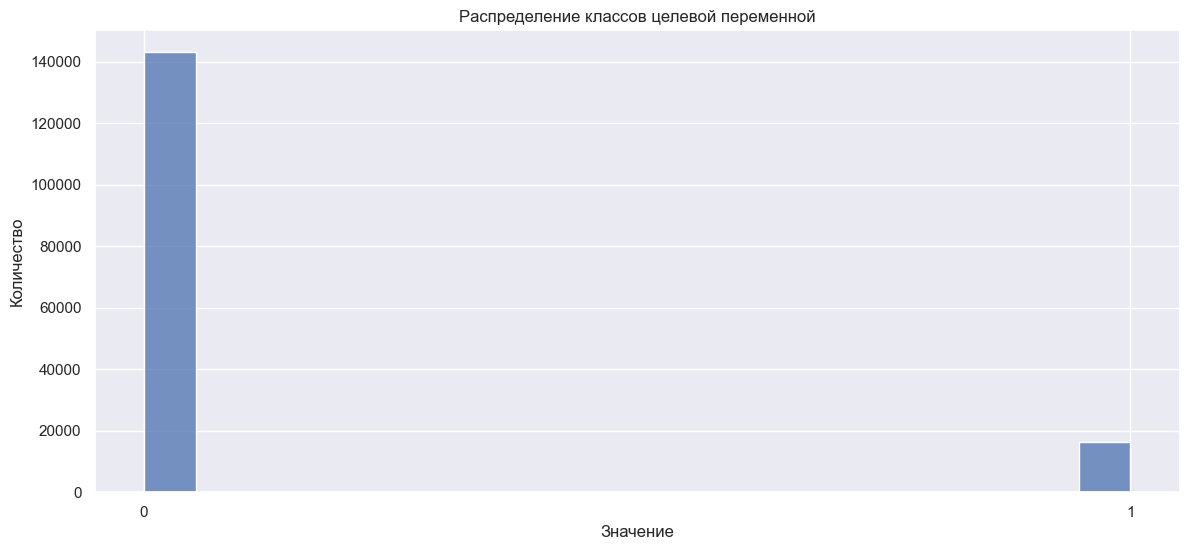

In [7]:
plt.figure(figsize=(14,6))
sns.set()
sns.histplot(df['toxic'])
plt.title('Pаспределение классов целевой переменной')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.xticks([0,1])
plt.show()

Классы не сбалансированны

### Вывод по знакомству с данными
* Загрузили и сохранили данные в переменную **df**
* Нужно избавится от столбеца **Unnamed: 0**
* Пропусков, проблем с типами данных, явных дубликатов, в данных нет,
* Классы в целевой переменной не сбалансированны

## Подготовка данных

### Избавление от лишних данных

Избавимся от столбца **Unnamed: 0**

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Мы избавились от столбца **Unnamed: 0**`

### Лемматизация

Пролемматизируем колонку **text**, для этого напишем функцию **lemm**

In [10]:
def clear_text(text):
    re_list = re.sub(r"[^a-zA-Z']", ' ', text)
    re_list = re_list.split()
    re_list = " ".join(re_list)
    return re_list

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    
    return ' '.join([lemmatizer.lemmatize(w) for w in word_list])

Применим функцию функцию **lemm**

In [11]:
df['lem_text'] = df['text'].apply(clear_text)
df['lem_text'] = df['text'].apply(lemmatize_text)
df = df.drop(['text'], axis=1)

Разделим данные на выборки

In [12]:
target = df['toxic']
features = df.drop(['toxic'], axis=1)['lem_text']

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                      target,
                                                      stratify=target,
                                                      test_size=0.2, 
                                                      random_state=RANDOM_STATE)

Проверим выборки

In [13]:
print('features_train:',X_train.shape[0])
print('target_train:',y_train.shape[0])
print()
print('features_test:',X_test.shape[0])
print('target_test:',y_test.shape[0])

features_train: 127433
target_train: 127433

features_test: 31859
target_test: 31859


TFIDF векторизация

In [14]:
stopwords = list(nltk_stopwords.words('english'))

## Обучение

Обучим 3 разные модели машинного обучения:
* LogisticRegression
* RandomForestClassifier
* CatBoostClassifier

### Модель LogisticRegression

Подберем лучшие параметры для LogisticRegression

In [15]:
%%time
pipeline = Pipeline([('tf_idf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', LogisticRegression())])
params = [{'clf__C': [5, 7.5, 10],
          'clf__class_weight': ['balanced'],
          'clf__random_state': [RANDOM_STATE]}]

gscv_lr = GridSearchCV(pipeline, params, scoring='f1', cv=5)
gscv_lr.fit(X_train, y_train)
print('Лучшее значение метрики:', round(gscv_lr.best_score_, 3),'\n')
print('Подобранные гиперпараметры модели')
gscv_lr.best_params_

Лучшее значение метрики: 0.767 

Подобранные гиперпараметры модели
CPU times: user 3min 32s, sys: 36 s, total: 4min 8s
Wall time: 2min 1s


{'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__random_state': 333}

In [16]:
df_model_select = pd.DataFrame({'model':['LogisticRegression'],
                                'score':[round(gscv_lr.best_score_, 3)]})

### Модель RandomForestClassifier

Подберем лучшие параметры для **RandomForestClassifie**

In [17]:
%%time

pipeline = Pipeline([('tf_idf', TfidfVectorizer(stop_words=stopwords)),
                 ('clf', RandomForestClassifier(random_state=RANDOM_STATE))])
params = {
    'clf__n_estimators': [100, 200] 
}

rscv_rfc = RandomizedSearchCV(pipeline, param_distributions=params, scoring='f1', verbose=False, n_jobs=-1) 
rscv_rfc.fit(X_train, y_train)

print('Лучшее значение метрики:', round(rscv_rfc.best_score_, 3),'\n')
print('Подобранные гиперпараметры модели')
rscv_rfc.best_params_

Лучшее значение метрики: 0.695 

Подобранные гиперпараметры модели
CPU times: user 21min 29s, sys: 9.18 s, total: 21min 38s
Wall time: 1h 5min 18s


{'clf__n_estimators': 200}

In [18]:
df_model_select.loc[1] = ['RandomForestClassifier', rscv_rfc.best_score_]
df_model_select

,model,score
0,LogisticRegression,0.767000
1,RandomForestClassifier,0.694618


### Модель CatBoostClassifier

In [19]:
%%time
pipeline = Pipeline([('tf_idf', TfidfVectorizer(stop_words=stopwords)),
                 ('clf', CatBoostClassifier(verbose=False, random_state=RANDOM_STATE))])
params = {
    'tf_idf__min_df': range(1, 3, 1),
    'clf__iterations': [100, 500]
}

rscv_cbc = RandomizedSearchCV(pipeline, param_distributions=params, scoring='f1', verbose=False, n_jobs=-1) 
rscv_cbc.fit(X_train, y_train)

print('Лучшее значение метрики:', round(rscv_cbc.best_score_, 3),'\n')
print('Подобранные гиперпараметры модели')
rscv_cbc.best_params_

Лучшее значение метрики: 0.743 

Подобранные гиперпараметры модели
CPU times: user 28min, sys: 23.7 s, total: 28min 24s
Wall time: 1h 27min 51s


{'tf_idf__min_df': 1, 'clf__iterations': 500}

In [20]:
df_model_select.loc[2] = ['CatBoostClassifier', rscv_cbc.best_score_]
df_model_select 

,model,score
0,LogisticRegression,0.767000
1,RandomForestClassifier,0.694618
2,CatBoostClassifier,0.743039


## Анализ лучшей модели

Проверим нашу выбранную модель **LinearRegression** на тестовой выборке

In [21]:
%%time
predict = gscv_lr.best_estimator_.predict(X_test)

CPU times: user 1.36 s, sys: 83 ms, total: 1.45 s
Wall time: 1.49 s


Посмотрим f1_score 

In [23]:
f1_score(predict, y_test)

0.7625795257374205

Мы построили модель со значением метрики качества F1 не меньше 0.76 

## Вывод

Знакомство с данными:
* Загрузили и сохранили данные в переменную df
* Пропусков, проблем с типами данных, явных дубликатов, в данных нет,
* Классы в целевой переменной не сбалансированы

Подготовка данных:
* Мы  избавились от лишней колонки **Unnamed: 0**
* Подготовили данные и разделили их на тренировочную, тестовую и валидационную выборку

Обучение моделей:
* Мы обучили три модели:
    * LogisticRegression
    * RandomForestClassifier
    * CatBoostRegressor
* Лучшей моделью была выбрана LogisticRegression

Анализ лучшей модели:
* Модель LogisticRegression набрала значение качества на метрике F1 0.76, что удовлетворяет условию задачи